<a href="https://colab.research.google.com/github/abyanjan/Natural-language-Processing-NLP-/blob/master/Text_classification_with_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Classification with BERT
Using Ktrain Library

### Importing Libraries

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 139kB/s 
     |████████████████████████████████| 983kB 51.1MB/s 
     |████████████████████████████████| 266kB 51.7MB/s 
     |████████████████████████████████| 1.3MB 53.7MB/s 
     |████████████████████████████████| 471kB 49.8MB/s 
     |████████████████████████████████| 2.9MB 48.4MB/s 
     |████████████████████████████████| 1.1MB 42.3MB/s 
     |████████████████████████████████| 890kB 50.8MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.0-cp36-none-any.whl size=25274500 sha256=ee394b0542be056bc30044e788de8ea7d3a034b43a85d293b32a39cce08fee41
  Stored in directory: /root/.cache/pip/wheels/5c/73/05/f36d0027bb6575384e21506dbba8db36a7825f15a24f09b2d5
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=8786984fede15ebf853991d6d80b757d9b56ae659cdc7f3aabeebdfa689f35c4
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for lan

In [ ]:
import os.path

import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text

### Data Processing

#### Loading IMDB dataset

In [ ]:
dataset = tf.keras.utils.get_file(fname="aclImdb_v1.tar.gz", 
                                  origin= "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
                                  extract =True)

84131840/84125825 [==============================] - 2s 0us/step


In [ ]:
IMDB_DATADIR = os.path.join(os.path.dirname(dataset),"aclImdb")
print(IMDB_DATADIR)

/root/.keras/datasets/aclImdb


#### Creating Training and Testing Dataset

In [ ]:
(X_train, y_train),(X_test, y_test),preproc = text.texts_from_folder(datadir=IMDB_DATADIR, 
                                                                     classes = ['pos','neg'],
                                                                     maxlen = 500,
                                                                     train_test_names = ['train','test'],
                                                                     preprocess_mode ='bert')

detected encoding: utf-8
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


### Building the BERT Model

In [ ]:
model = text.text_classifier(name="bert",
                             train_data=(X_train,y_train),
                             preproc=preproc)

Is Multi-Label? False
maxlen is 500
done.


### Training the model

In [ ]:
learner = ktrain.get_learner(model = model,
                             train_data=(X_train, y_train),
                             val_data=(X_test,y_test),
                             batch_size=6)

In [ ]:
# learner.lr_find(max_epochs=2)

In [ ]:
learner.fit_onecycle(lr=2e-5, epochs=1)



begin training using onecycle policy with max lr of 2e-05...
4167/4167 [==============================] - 5422s 1s/step - loss: 0.2514 - accuracy: 0.8975 - val_loss: 0.1646 - val_accuracy: 0.9370


### Prediction

In [ ]:
#predictor = ktrain.get_predictor(model = learner.model, preproc=preproc)

In [ ]:
test_pred =learner.model.predict(X_test)

In [ ]:
test_pred

array([[0.9717036 , 0.02829649],
       [0.9984786 , 0.00152147],
       [0.99439704, 0.00560303],
       ...,
       [0.02008633, 0.9799137 ],
       [0.00293493, 0.9970651 ],
       [0.00980046, 0.9901995 ]], dtype=float32)

**AUC score**

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
auc = roc_auc_score(y_test, test_pred)
print(f"AUC score: {round(auc,3)}")

AUC score: 0.983


**Confusion matrix**

In [ ]:
test_pred_class = 1 - np.argmax(test_pred,axis=1)

In [ ]:
acc_score = accuracy_score(y_test[:,0],test_pred_class)
print(f"Accuracy Score : {round(acc_score,3)}")

Accuracy Score : 0.937


In [ ]:
conf_mat = confusion_matrix(y_test[:,0], test_pred_class)

In [ ]:
conf_mat

array([[11755,   745],
       [  831, 11669]])

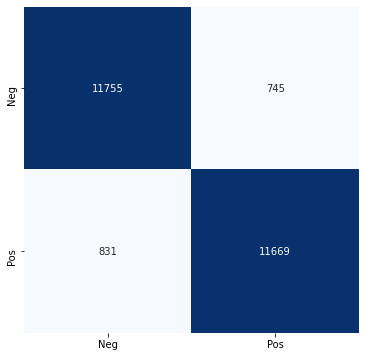

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat,annot=True,fmt="",cmap='Blues',cbar=False, xticklabels=["Neg","Pos"], yticklabels=["Neg","Pos"])
plt.show()